In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import plotly.graph_objects as go

In [102]:
#Read Datasets

df = pd.read_csv("NFWBS_PUF_2016_data.csv")
pd.set_option('display.max_columns',None)
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,SAVEHABIT,FRUGALITY,AUTOMATED_1,AUTOMATED_2,ASK1_1,ASK1_2,SUBNUMERACY2,SUBNUMERACY1,CHANGEABLE,GOALCONF,LMscore,FINKNOWL1,FINKNOWL2,FINKNOWL3,FK1correct,FK2correct,FK3correct,KHscore,KHKNOWL1,KHKNOWL2,KHKNOWL3,KHKNOWL4,KHKNOWL5,KHKNOWL6,KHKNOWL7,KHKNOWL8,KHKNOWL9,KH1correct,KH2correct,KH3correct,KH4correct,KH5correct,KH6correct,KH7correct,KH8correct,KH9correct,ENDSMEET,HOUSING,LIVINGARRANGEMENT,HOUSERANGES,IMPUTATION_FLAG,VALUERANGES,MORTGAGE,SAVINGSRANGES,PRODHAVE_1,PRODHAVE_2,PRODHAVE_3,PRODHAVE_4,PRODHAVE_5,PRODHAVE_6,PRODHAVE_7,PRODHAVE_8,PRODHAVE_9,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,EARNERS,VOLATILITY,SNAP,MATHARDSHIP_1,MATHARDSHIP_2,MATHARDSHIP_3,MATHARDSHIP_4,MATHARDSHIP_5,MATHARDSHIP_6,COLLECT,REJECTED_1,REJECTED_2,ABSORBSHOCK,BENEFITS_1,BENEFITS_2,BENEFITS_3,BENEFITS_4,BENEFITS_5,FRAUD2,COVERCOSTS,BORROW_1,BORROW_2,SHOCKS_1,SHOCKS_2,SHOCKS_3,SHOCKS_4,SHOCKS_5,SHOCKS_6,SHOCKS_7,SHOCKS_8,SHOCKS_9,SHOCKS_10,SHOCKS_11,SHOCKS_12,MANAGE2,PAIDHELP,HSLOC,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,OBJNUMERACY1,ON2correct,ON1correct,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3,CONNECT,HEALTH,SCFHORIZON,DISCOUNT,MEMLOSS,DISTRESS,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,OUTLOOK_1,OUTLOOK_2,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,INTERCONNECTIONS_10,PEM,HOUSESAT,SOCSEC1,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,4,6,0,0,4,3,3,3,4,3,3,1,3,2,1,1,1,1.267,3,3,2,1,1,2,4,2,1,1,1,1,1,1,1,1,1,1,2,1,1,4,0,2,2,6,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,3,2,1,1,2,0,1,1,1,1,1,1,1,0,0,4,0,0,1,0,0,8,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,-2,-1,4,0,1,1,1,1,1,1,3,1,0,3,5,4,80,2,3,2,0,4,2,3,3,3,2,0,0,0,0,1,0,1,1,0,0,3,4,1,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,1,5,0,0,3,2,5,5,2,3,3,1,3,2,1,1,1,-0.570,2,3,3,1,1,2,2,3,1,0,1,0,1,1,1,0,0,1,2,1,2,4,0,2,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,2,2,0,1,1,1,1,1,1,1,0,0,3,1,0,0,0,1,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,0,0,0,1,0,0,2,1,1,3,4,3,95,3,3,1,0,3,2,4,3,2,5,0,1,0,0,0,0,0,0,0,0,4,3,-2,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,5,5,1,1,4,4,4,4,6,3,3,1,3,2,1,1,1,-0.188,3,3,1,1,2,2,2,2,1,1,1,0,1,0,1,0,1,1,1,1,2,3,0,3,2,4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,3,3,1,2,3,0,1,1,1,1,1,1,0,0,0,4,1,0,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,3,-2,1,3,0,0,0,1,0,0,1,2,0,1,4,4,3,50,3,4,2,0,2,3,3,3,4,4,0,1,0,0,0,0,0,0,0,0,6,3,-2,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,4,6,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,2,1,0,1,-1.485,2,2,3,1,2,2,2,-1,1,0,0,0,1,0,1,0,0,1,-1,-1,-1,99,0,-2,-2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,-1,0,1,8,0,0,0,0,0,8,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,1,-1,-2,1,2,0,1,1,1,1,1,1,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,1,-1,-1,-2,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0

In [103]:
df.shape

(6394, 217)

In [104]:
# Coba dipakein minmaxscaler sama PCA
X = df.drop('fpl', axis = 1)
y = df['fpl']
X_scaler = MinMaxScaler().fit_transform(X)
X_scaler

array([[0.44345197, 0.5       , 0.81818182, ..., 0.        , 0.83333333,
        0.03116358],
       [0.08478769, 0.        , 0.90909091, ..., 0.33333333, 0.83333333,
        0.17951101],
       [0.90366909, 0.        , 0.72727273, ..., 0.33333333, 1.        ,
        0.10344168],
       ...,
       [0.21794696, 0.        , 0.81818182, ..., 0.33333333, 0.83333333,
        0.14995946],
       [0.19128762, 0.        , 0.81818182, ..., 0.33333333, 0.83333333,
        0.16365777],
       [0.19142504, 1.        , 0.72727273, ..., 0.33333333, 0.        ,
        0.07120574]])

In [105]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_scaler)
df0 = pd.DataFrame(data = principalComponents, columns = ['a', 'b','c','d','e','f','g','h','i','j'])
df0.head()

,a,b,c,d,e,f,g,h,i,j
0,-1.799061,0.835197,-0.940532,0.106439,-0.248205,0.904081,-0.499531,0.566164,-0.252462,0.160635
1,0.807689,-0.521846,0.063328,-0.734154,0.662672,-0.827132,-0.128860,0.385354,-0.632931,-0.190072
2,0.554951,-0.479322,0.442540,0.109648,0.320200,0.835394,0.625546,0.928724,-0.493561,-0.021448
3,2.243992,1.653948,0.946269,-1.400152,0.617776,0.656507,0.720878,0.993833,0.432773,0.906712
4,2.149611,-0.314716,0.733870,0.765971,-0.187792,0.934646,0.599655,1.101705,0.333703,-0.257698


In [106]:
new_df = df0.copy()
new_df['fpl'] = y

In [107]:
new_df.fpl.value_counts()

3    4874
2     859
1     661
Name: fpl, dtype: int64

In [108]:
new_df = new_df.reset_index()

In [109]:
#Ambil 100 data dari setiap class, biar ga kebanyakan datanya
df_test = pd.DataFrame()
a = 0
b = 0
c = 0
i = 0
while (a < 100) or (b < 100) or (c < 100) and (i != df_test.shape[0]):
    if (new_df['fpl'].iloc[i] == 1) and (a < 100):
        df_test = df_test.append(new_df.iloc[i])
        a += 1
    if (new_df['fpl'].iloc[i] == 2) and (b < 100):
        df_test = df_test.append(new_df.iloc[i])
        b += 1
    if (new_df['fpl'].iloc[i] == 3) and (c < 100):
        df_test = df_test.append(new_df.iloc[i])
        c += 1
    i+=1

df_test.head()

,a,b,c,d,e,f,fpl,g,h,i,index,j
0,-1.799061,0.835197,-0.940532,0.106439,-0.248205,0.904081,3.0,-0.499531,0.566164,-0.252462,0.0,0.160635
1,0.807689,-0.521846,0.063328,-0.734154,0.662672,-0.827132,3.0,-0.128860,0.385354,-0.632931,1.0,-0.190072
2,0.554951,-0.479322,0.442540,0.109648,0.320200,0.835394,3.0,0.625546,0.928724,-0.493561,2.0,-0.021448
3,2.243992,1.653948,0.946269,-1.400152,0.617776,0.656507,3.0,0.720878,0.993833,0.432773,3.0,0.906712
4,2.149611,-0.314716,0.733870,0.765971,-0.187792,0.934646,3.0,0.599655,1.101705,0.333703,4.0,-0.257698


In [110]:
#Split fitur sama class
x = df_test.drop('fpl', axis=1)
y = df_test.fpl

In [111]:
#Fungsi euclidean yang habis validasi. return isi data hasil rumus
def d_euclidean(train, test):
    distances=[]
    for i in range(train.shape[0]):
        d_index=[]
        for j in range(test.shape[0]):
            sum=0
            for k in range(test.shape[1]):
                temp = ((train.iloc[i][k] - test.iloc[j][k]) ** 2)
                sum = sum + temp
            d_index.append(math.sqrt(sum))
        distances.append(d_index)
    return distances

# d_euclidean(x_train, x_test)

In [112]:
#Fungsi validasi, tapi aku ngikut yang di ppt, jadi ga pake euclidean. return array isi data hasil rumus
def valid_train(data):
    validity = []
    for i in range(data.shape[0]):
        equal = 0
        for j in range(data.shape[0]-1):
            if data.iloc[i] == data.iloc[(i+j)%data.shape[0]]:
                equal += 1
        validity.append(equal/data.shape[0])
    return validity

# valid_train = valid_train(y_train)

In [113]:
#Fungsi berat, sesuai rumus. return array isi weight
def weight(valid, euclidean):
    weight = []
    valid = np.array(valid)
    euclidean = np.array(euclidean)
    for i in range(euclidean.shape[0]):
        w_index = []
        for j in range(euclidean[i].shape[0]):
            w = valid[i]*(1/(euclidean[i][j]+0.5))
            w_index.append(w)
        weight.append(w_index)
#         print(i," ",w_index)
    return weight
            
# weight = weight(valid,distances)
# weight

In [114]:
#Buat cari 3 minimum, di pake habis cari weight nya. return ID setiap array
def minimum3(weight):
    nums = []
    ids = []
    for i in range(len(weight)):
        num1 = 1
        num2 = 1
        num3 = 1
        id1 = 0
        id2 = 0
        id3 = 0
        for j in range(len(weight[i])):
            if(weight[i][j] < num1):
                num3 = num2
                num2 = num1
                num1 = weight[i][j]
                id3 = id2
                id2 = id1
                id1 = j
            else:
                if(weight[i][j] < num2):
                    num3 = num2
                    num2 = weight[i][j]
                    id3 = id2
                    id2 = j
                else:
                    if(weight[i][j] < num3):
                        num3 = weight[i][j]
                        id3 = j
        nums.append([num1,num2,num3])
        ids.append([id1,id2,id3])
    return ids

# ids = minimum3(weight)

In [115]:
#menghitung jumlah class
def count_class(data, minimum):
    result = []
    for i in range(len(ids)):
        sum = [0,0,0]
        for j in range(len(minimum[i])):
            if data.iloc[minimum[i][j]] == 1:
                sum[0] += 1
            if data.iloc[minimum[i][j]] == 2:
                sum[1] += 1
            if data.iloc[minimum[i][j]] == 3:
                sum[2] += 1
        result.append(sum)
    return result

# count_class = count_class(y_train, ids)
# count_class


In [116]:
def classification(count_class):
    classification = []

    for i in range(len(count_class)):
        classification.append(count_class[i].index(max(count_class[i])) + 1)
    
    return classification

# print(classification(count_class))

In [117]:
def cek_jumlah(data, value):
    sum = 0
    for i in range(len(data)):
        if data[i] == value:
            sum += 1
    
    return sum
# cek_jumlah(weight[2],0.002302531069155555)

In [122]:
#Main Algorithm... tempat perulangan utama. Fungsi MKNN nya ada dibawah wkwkwk
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from statistics import mean 
kf=KFold(n_splits=10, shuffle=True)
print(kf)
i=1
cross = [[],[],[],[],[]]
f_measure = [[],[],[],[],[]]
recall = [[],[],[],[],[]]
prec = [[],[],[],[],[]]
MKNN_arr = [[],[],[],[],[]]
for train_index, test_index in kf.split(x):
    print("Fold ", i)
    print("TRAIN :", train_index.shape, "TEST :", test_index.shape)
    
    x_train=x.iloc[train_index]
    x_test=x.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    
    print("")
    print("Cross Validation ",i)
    knn= KNeighborsClassifier(n_neighbors=3)
    score= cross_validate(knn, x_train, y_train, cv=3, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])   
    print("Accuracy : ", score['test_accuracy'])
    print("Mean Accuracy : ",mean(score['test_accuracy']))
    print("Precision : ", score['test_precision_macro'])
    print("Mean Precision : ",mean(score['test_precision_macro']))
    print("Recall : ", score['test_recall_macro'])
    print("Mean Recall : ",mean(score['test_recall_macro']))
    print("F1 Score : ", score['test_f1_macro'])
    print("Mean F1 Score : ",mean(score['test_f1_macro']))
    
    cross[0].append(i)
    cross[1].append(score['test_accuracy'][0])
    cross[2].append(score['test_accuracy'][1])
    cross[3].append(score['test_accuracy'][2])
    cross[4].append(mean(score['test_accuracy']))
    
    prec[0].append(i)
    prec[1].append(score['test_precision_macro'][0])
    prec[2].append(score['test_precision_macro'][1])
    prec[3].append(score['test_precision_macro'][2])
    prec[4].append(mean(score['test_precision_macro']))
    
    recall[0].append(i)
    recall[1].append(score['test_recall_macro'][0])
    recall[2].append(score['test_recall_macro'][1])
    recall[3].append(score['test_recall_macro'][2])
    recall[4].append(mean(score['test_recall_macro']))
    
    f_measure[0].append(i)
    f_measure[1].append(score['test_f1_macro'][0])
    f_measure[2].append(score['test_f1_macro'][1])
    f_measure[3].append(score['test_f1_macro'][2])
    f_measure[4].append(mean(score['test_f1_macro']))
    
    print("")
    print("MKNN")
    print("Validation ",i)
    valid = valid_train(y_train)
#     print(np.array(valid))
    
    print("")
    print("Euclidean ",i)
    distances = d_euclidean(x_train,x_test)
#     print(np.array(distances))
    print("done counting euclidean")
    
    print("")
    print("Weight ",i)
    print("counting weight...")
    weights = weight(valid, distances)
#     print(np.array(weights))
    print("done")
    print("")
    
    print("")
    print("Search for Minimum weight...")
    ids = minimum3(weights)
#     print(np.array(ids))
    
    print("")
    print("classification ", i)
    count = count_class(y_train, ids)
    classifications = classification(count)
    print(classifications)
    
    print("")
    print("Evaluasi MKNN")
    print("Akurasi : ", accuracy_score(y_train, classifications))
    print("Precision : ", precision_score(y_train, classifications, average='macro'))
    print("Recall : ", recall_score(y_train, classifications, average='macro'))
    print("F1 Score : ", f1_score(y_train, classifications, average='macro'))
    
    MKNN_arr[0].append(i)
    MKNN_arr[1].append(accuracy_score(y_train, classifications))
    MKNN_arr[2].append(precision_score(y_train, classifications, average='macro'))
    MKNN_arr[3].append(recall_score(y_train, classifications, average='macro'))
    MKNN_arr[4].append(f1_score(y_train, classifications, average='macro'))
    
    i+=1


cross[0].append("Avg")
cross[1].append(mean(cross[1]))
cross[2].append(mean(cross[2]))
cross[3].append(mean(cross[3]))
cross[4].append(mean(cross[4]))

MKNN_arr[0].append("Avg")
MKNN_arr[1].append(mean(MKNN_arr[1]))
MKNN_arr[2].append(mean(MKNN_arr[2]))
MKNN_arr[3].append(mean(MKNN_arr[3]))
MKNN_arr[4].append(mean(MKNN_arr[4]))

KFold(n_splits=10, random_state=None, shuffle=True)
Fold  1
TRAIN : (270,) TEST : (30,)

Cross Validation  1
Accuracy :  [0.41111111 0.28888889 0.42222222]
Mean Accuracy :  0.37407407407407406
Precision :  [0.25070301 0.46486605 0.50531401]
Mean Precision :  0.4069610227300039
Recall :  [0.4137931  0.2887035  0.41149425]
Mean Recall :  0.3713302846784493
F1 Score :  [0.29592916 0.32441734 0.33292929]
Mean F1 Score :  0.31775859795221123

MKNN
Validation  1


C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  1
done counting euclidean

Weight  1
counting weight...
done


Search for Minimum weight...

classification  1
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.3333333333333333
Precision :  0.111111

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  2
done counting euclidean

Weight  2
counting weight...
done


Search for Minimum weight...

classification  2
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.14444444444444443
Precision :  0.06701

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  3
done counting euclidean

Weight  3
counting weight...
done


Search for Minimum weight...

classification  3
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.34074074074074073
Precision :  0.11358

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  4
done counting euclidean

Weight  4
counting weight...
done


Search for Minimum weight...

classification  4
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.1111111111111111
Precision :  0.060606

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  5
done counting euclidean

Weight  5
counting weight...
done


Search for Minimum weight...

classification  5
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.11481481481481481
Precision :  0.06458

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  6
done counting euclidean

Weight  6
counting weight...
done


Search for Minimum weight...

classification  6
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.11851851851851852
Precision :  0.06311

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  7
done counting euclidean

Weight  7
counting weight...
done


Search for Minimum weight...

classification  7
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.17037037037037037
Precision :  0.07986

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  8
done counting euclidean

Weight  8
counting weight...
done


Search for Minimum weight...

classification  8
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.13703703703703704
Precision :  0.06457

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  9
done counting euclidean

Weight  9
counting weight...
done


Search for Minimum weight...

classification  9
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.17037037037037037
Precision :  0.07666

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Euclidean  10
done counting euclidean

Weight  10
counting weight...
done


Search for Minimum weight...

classification  10
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Evaluasi MKNN
Akurasi :  0.13703703703703704
Precision :  0.06

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [123]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Cross1','Cross2','Cross3','Avg']
    ),
    cells=dict(
        values=[cross[0],cross[1],cross[2], cross[3], cross[4]])
    )
])
fig.show()

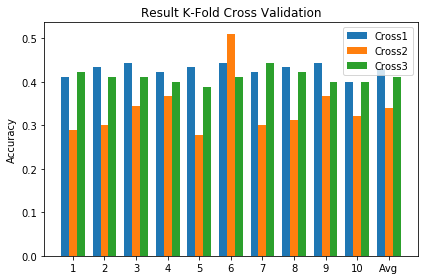

In [141]:
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

position = np.arange(len(cross[0]))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(position - width, cross[1], width, label='Cross1')
rects2 = ax.bar(position, cross[2], width, label='Cross2')
rects3 = ax.bar(position + width, cross[3], width, label='Cross3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Result K-Fold Cross Validation')
ax.set_xticks(position)
ax.set_xticklabels(cross[0])
ax.legend()

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [126]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Cross1','Cross2','Cross3','Avg']
    ),
    cells=dict(
        values=[prec[0],prec[1],prec[2],prec[3],prec[4]])
    )
])
fig.show()

In [129]:
recall[0].append("Avg")
recall[1].append(mean(recall[1]))
recall[2].append(mean(recall[2]))
recall[3].append(mean(recall[3]))
recall[4].append(mean(recall[4]))

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Cross1','Cross2','Cross3','Avg']
    ),
    cells=dict(
        values=[recall[0],recall[1],recall[2], recall[3], recall[4]])
    )
])
fig.show()

In [131]:
f_measure[0].append("Avg")
f_measure[1].append(mean(f_measure[1]))
f_measure[2].append(mean(f_measure[2]))
f_measure[3].append(mean(f_measure[3]))
f_measure[4].append(mean(f_measure[4]))

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Cross1','Cross2','Cross3','Avg']
    ),
    cells=dict(
        values=[f_measure[0],f_measure[1],f_measure[2], f_measure[3], f_measure[4]])
    )
])
fig.show()

In [130]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Accuracy','Precission','Recall','F1']
    ),
    cells=dict(
        values=[MKNN_arr[0],MKNN_arr[1],MKNN_arr[2],MKNN_arr[3],MKNN_arr[4]])
    )
])
fig.show()

<function matplotlib.pyplot.show(*args, **kw)>

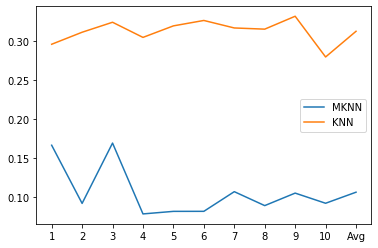

In [146]:
plt.plot(cross[0], MKNN_arr[4], label="MKNN")
plt.plot(cross[0], f_measure[1], label="KNN")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

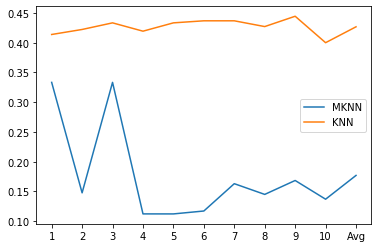

In [147]:
plt.plot(cross[0], MKNN_arr[3], label="MKNN")
plt.plot(cross[0], recall[1], label="KNN")
plt.legend()
plt.show

In [60]:
# import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['K','Cross1','Cross2','Cross3','Avg']
    ),
    cells=dict(
        values=[[1,2,3,4,'Avg'],[100, 90, 80, 90], [95, 85, 75, 95]])
    )
])
fig.show()